In [1]:
import json
from backend.models import UserDocument
from ai_module.lg_models import CVGenState

# Charger les données de test
with open('../../data/user_test_user.json', 'r', encoding='utf-8') as f:
    test_data = json.load(f)

# Créer un UserDocument à partir des données de test
user_doc = UserDocument(**test_data)

# Créer un CVGenState à partir du UserDocument
# Utilisons "CV par défaut" comme nom de CV
cv_state = CVGenState.from_user_document(user_doc, "cv_1")

# Afficher les informations principales du CVGenState
print(f"Nom: {cv_state.head.name}")
print(f"Titre brut: {cv_state.head.title_raw}")
print(f"Titre raffiné: {cv_state.head.title_refined}")
print(f"Email: {cv_state.head.mail}")
print(f"Téléphone: {cv_state.head.tel_refined}")
print(f"\nNombre d'expériences: {len(cv_state.experiences)}")
print(f"Nombre de formations: {len(cv_state.education)}")
print(f"\nCompétences brutes: {cv_state.skills_raw}")
print(f"Langues brutes: {cv_state.langues_raw}")
print(f"Centres d'intérêt: {cv_state.hobbies_refined}")
print(f"\nPoste visé brut: {cv_state.job_raw}")

Nom: Alexis de Monts
Titre brut: Data Engineer | Machine Learning Engineer | Cloud Architect
Titre raffiné: 
Email: alexis.demonts.s@gmail.com
Téléphone: 

Nombre d'expériences: 8
Nombre de formations: 3

Compétences brutes: Cloud (GCP, AWS), DevOps (CI/CD, Docker), MLOps, Data Science, Machine Learning, Data Engineering, Python, SQL, Git, Flutter
Langues brutes: Francais (natif), Anglais (courant), Italien (fonctionnel)
Centres d'intérêt: Technologies emergentes, developpement d'applications, voyages, engagement humanitaire

Poste visé brut: Fiche de Poste - Machine Learning Engineer

Localisation : Paris, France (Hybrid)

Type de Contrat : CDI

Experience : 3+ ans

Salaire : 55k - 75k EUR selon experience

Secteur : Tech / IA / Data


A propos de nous

Nous sommes une startup innovante specialisee dans l'intelligence artificielle et le traitement des donnees a grande echelle. Nous developpons des solutions de Machine Learning et Deep Learning pour optimiser la prise de decision et au

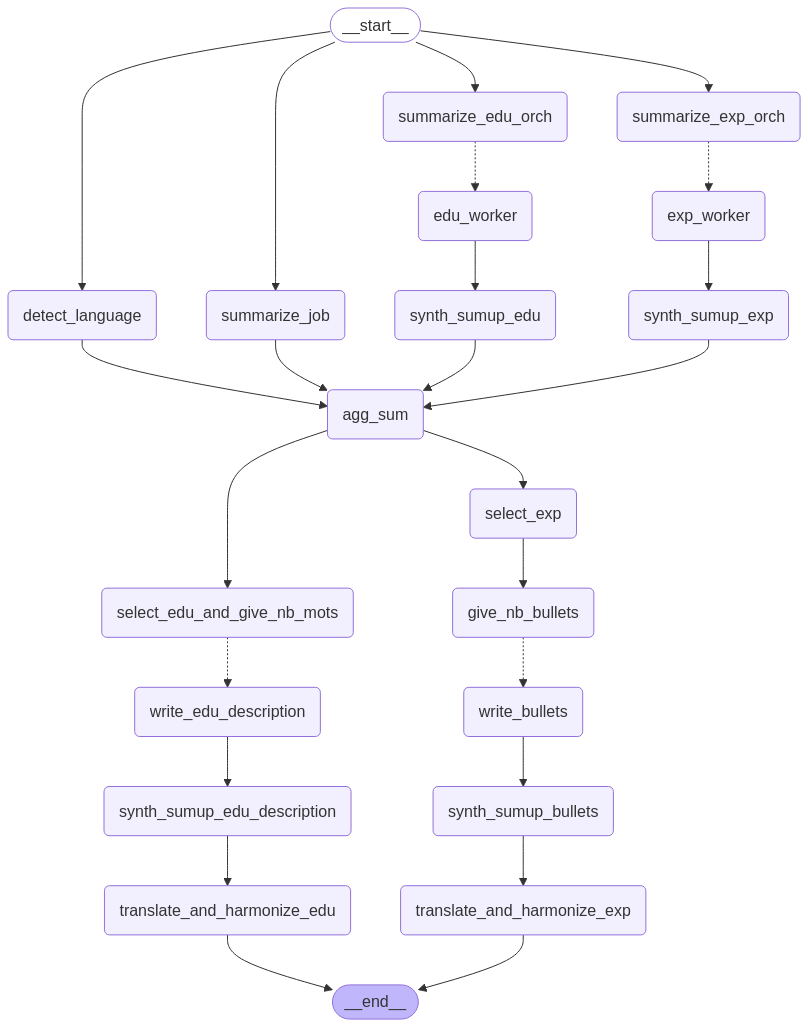

In [2]:
# Importer le graphe compilé pour la génération de CV
from ai_module.chains_gen_cv.gen_cv_chain import create_cv_chain
from IPython.display import Image, display

graph = create_cv_chain().compile()

display(Image(graph.get_graph().draw_mermaid_png()))

In [3]:
result = graph.invoke(cv_state)



In [4]:
for exp in result['experiences']:
    print(f"Description brute: {exp.description_raw}")
    print(f"Résumé: {exp.summary}")

Description brute: Mission chez Renault (FLMDH - Fleet Management Data Hub). Dans le cadre de cette mission strategique, j'ai joue un role central dans la modernisation et la structuration des equipes data engineering de Renault, tout en pilotant des projets cles pour accompagner la transition du groupe vers le leasing et le vehicule electrique. Contributions principales : 1. Cadrage et pilotage des equipes Data Engineer : Management d'une equipe de 5 data engineers, en assurant le cadrage des activites, la definition des priorites, et la montee en competence des membres sur de nouveaux outils et pratiques. Mise en place d'une methodologie de travail structuree, alignee sur les objectifs strategiques du groupe et integrant des outils modernes pour ameliorer la productivite et la collaboration. 2. Transition vers dbt sur Cloud Run : Conception et deploiement d'une solution innovante pour dbt, utilisant un service dedie sur Cloud Run, une premiere dans l'ecosysteme Renault. Creation from

In [5]:
for exp in result['experiences']:
    print(f"Bullets pour l'expérience '{exp.title_raw}' chez '{exp.company_raw}':")
    for bullet in exp.bullets:
        print(f"- {bullet}")
    print("\n")


Bullets pour l'expérience 'Senior Data Scientist' chez 'EY':
- Modernisation des équipes de data engineering de Renault.
- Pilotage de la transition vers dbt sur Cloud Run.
- Introduction de pratiques DevOps.
- Développement de modèles ML pour estimer les valeurs résiduelles des véhicules.
- Amélioration de la qualité des données et facilitation de la prise de décision stratégique.


Bullets pour l'expérience 'Co-fondateur et CTO' chez 'Kadi':
- Direction du développement d'une application mobile innovante pour l'analyse automatique de tickets de caisse.
- Intégration de l'IA et du cloud.
- Conception de l'architecture technique et supervision du déploiement.
- Optimisation des pipelines de données.
- Création d'une application intuitive sur les principales plateformes mobiles.




In [6]:
for edu in result['education']:
    print(f"Description brute: {edu.description_raw}")
    print(f"Résumé: {edu.summary}")
    print(f"Description générée: {edu.description_generated}")


Description brute: 
Résumé: Master of Engineering (MEng) obtenu à l'École des Ponts ParisTech de 2017 à 2021.
Description générée: Master en Informatique, spécialisation en Intelligence Artificielle, Université de Paris, 2019. Formation axée sur le Machine Learning, Deep Learning et traitement de données. Projets pratiques en développement de modèles prédictifs et optimisation de pipelines de données, avec une solide maîtrise des outils Python et des environnements cloud.
Description brute: 
Résumé: Master 2 en Mathématiques appliquées au Politecnico di Milano, de 2020 à 2021.
Description générée: Master en Informatique, Université de Paris, 2018. Spécialisation en Intelligence Artificielle et Machine Learning. Projets réalisés : développement d'algorithmes de classification et de régression, optimisation de modèles de Deep Learning. Compétences acquises en Python, traitement de données et MLOps.
